In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from pathlib import Path

In [2]:
DATA_PATH = "../data/cgpa_package.csv"   # because notebook is inside notebooks/
df = pd.read_csv(DATA_PATH)

# Clean columns
df.columns = df.columns.str.lower().str.strip()
df.head()


,cgpa,package_lpa
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
df.columns

Index(['cgpa', 'package_lpa'], dtype='object')

In [6]:
from sklearn.model_selection import train_test_split

X = df[["cgpa"]]
y = df["package_lpa"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((160, 1), (40, 1))

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

m = model.coef_[0]
b = model.intercept_

m, b


(np.float64(0.5742564727019197), np.float64(-1.0270069374542108))

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(0.23150985393278373, 0.2901316659954521, 0.7730984312051673)

C:\Users\saba shahbaz\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


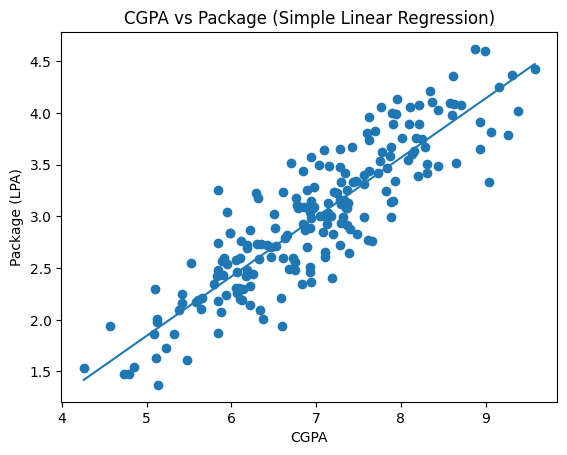

In [10]:
plt.scatter(X, y)
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

plt.plot(x_line, y_line)
plt.xlabel("CGPA")
plt.ylabel("Package (LPA)")
plt.title("CGPA vs Package (Simple Linear Regression)")
plt.show()


In [11]:
cgpa = 8.5
pred = model.predict([[cgpa]])[0]
pred


C:\Users\saba shahbaz\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(3.854173080512107)

In [12]:
Path("../models").mkdir(exist_ok=True)
joblib.dump(model, "../models/linear_model.pkl")
print("Saved model to ../models/linear_model.pkl")


Saved model to ../models/linear_model.pkl
